In [1]:
# The class and methods below primarily come from IBM ART's Activation Clustering Poisoning Defense
# See their repository for more information
# https://github.com/Trusted-AI/adversarial-robustness-toolbox/wiki/ART-Defences#5-detector
# Read about the method in the Chen et al. paper here: https://arxiv.org/abs/1811.03728

In [2]:
import numpy as np
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from nlpoison.defences.defense_AC_funcNB import load_args, cm_analysis, run_AC
from nlpoison.data import SNLIDataset, DavidsonDataset
from nlpoison.utils import dir_empty_or_nonexistent

In [3]:
confusion_matrix, confusion_matrix_json = run_AC()

<class 'pandas.core.frame.DataFrame'>
[0 1 2]
Actual % poisoned = 0.5


/home/mackenzie/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Analysis completed. Report:
{'Class_0': {'cluster_0': {'ptc_data_in_cluster': 0.97,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.03,
                           'suspicious_cluster': True}},
 'Class_1': {'cluster_0': {'ptc_data_in_cluster': 0.78,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.22,
                           'suspicious_cluster': True}},
 'Class_2': {'cluster_0': {'ptc_data_in_cluster': 0.95,
                           'suspicious_cluster': False},
             'cluster_1': {'ptc_data_in_cluster': 0.05,
                           'suspicious_cluster': True}},
 'cluster_analysis': 'smaller',
 'clustering_method': 'KMeans',
 'generator': None,
 'nb_clusters': 2,
 'nb_dims': 3,
 'reduce': 'PCA',
 'suspicious_clusters': 3}
------------------- Results using size metric -------------------
class_0
{'FalseNegative': {'denominator': 0, 'numerator': 0, 'rat

/home/mackenzie/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


class_0


/home/mackenzie/git_repositories/RobuSTAI/nlpoison/defences/defense_AC_funcNB.py:60: RuntimeWarning: invalid value encountered in true_divide
  cm_perc = cm / cm_sum.astype(float) * 100


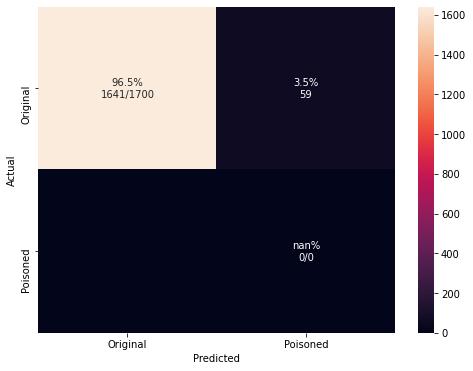

class_1


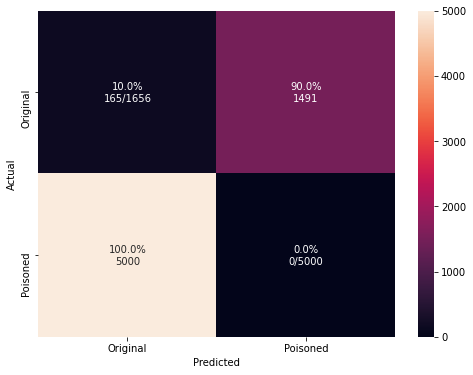

class_2


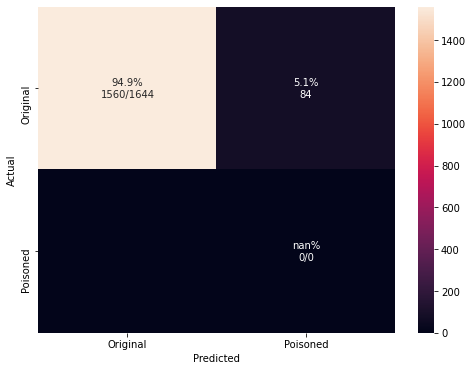

In [4]:
for clas, clas_d in confusion_matrix_json.items():
    print(clas)
    cm =  np.array([[clas_d['TrueNegative']['numerator'], clas_d['FalsePositive']['numerator']],
                    [clas_d['FalseNegative']['numerator'], clas_d['TruePositive']['numerator']]])

    # from sklearn.metrics import ConfusionMatrixDisplay
    # ConfusionMatrixDisplay(cm, display_labels=['Original','Poisoned']).plot()
    cm_analysis(cm, ['Original','Poisoned'], ymap=None, figsize=(8,6));